<a href="https://colab.research.google.com/github/VictorPabloCristina/DataSet-Proyecto-F-CH/blob/main/Proyecto_DS_Parte3_Cristina_Victor_Pablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega Parte 3 DS Cristina Victor Pablo

Eleccion de Algoritmo para el modelo

In [ ]:
#visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#lectura y análisis
import numpy as np
import pandas as pd
import scipy

#Machine Learning
import sklearn # Paquete base de ML

#adicionales
from scipy.stats import norm
from sklearn.cluster import KMeans

#escaladores
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Curso Data Science/Proyecto DS/FIFA22_official_data.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print=(df.shape)
df.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


In [ ]:
#Selleccionamos cuales columnas trabajaremos para verificar las habilidades entre los distintos jugadores

df_modelo=df[['ID',"Preferred Foot",'Volleys',"Overall",'Potential','BallControl',"ShotPower"]]
df_modelo.head(5)

,ID,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
0,212198,Right,87.0,88,89,87.0,89.0
1,209658,Right,69.0,87,88,87.0,85.0
2,176580,Right,90.0,88,88,86.0,89.0
3,192985,Right,82.0,91,91,91.0,91.0
4,224334,Left,68.0,84,84,88.0,82.0


**CONCIGNA**

Analizar si los que son Zurdos o Diestros tienen algunas habilidades especiales o marcan la diferencia.


Text(0.5, 1.0, 'Potencia de disparo vs. Control de balon')

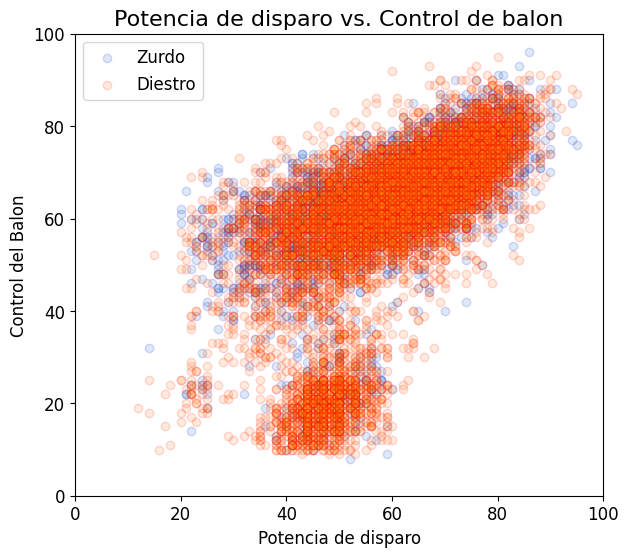

In [ ]:
# Extraemos algunas columnas de interes
df_modelo = df[["Preferred Foot",  "ShotPower",'BallControl']]
# Filtramos por pierna mas habil en el nuevo DS
df_Z = df_modelo[df_modelo['Preferred Foot'] == 'Left']

df_D = df_modelo[df_modelo['Preferred Foot'] == 'Right']

plt.figure(figsize=(15,6))

# Control del balon VS Potencia de tiro - Para los Zurdos y Diestros
plt.subplot(121)
plt.scatter(df_Z['ShotPower'], df_Z['BallControl'], edgecolor='b', alpha=0.15, label='Zurdo')
plt.scatter(df_D['ShotPower'], df_D['BallControl'], edgecolor='r', alpha=0.15, label='Diestro')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 100)
plt.xlabel('Potencia de disparo', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Control del Balon', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Potencia de disparo vs. Control de balon', fontsize=16)



En primera impresion, pareciera que hay dos Zonas marcadas en diferencia de habilidades, pero no distinguidas etre Zurdos y Diestros, por un lado hay jugadores con poco control del balon y potencia de disparo media, por otro lado hay jugadores que estan con el control del balon y potencia media, y luego la zona en los que se destacan de alto control del balon y alta potencia de disparo.

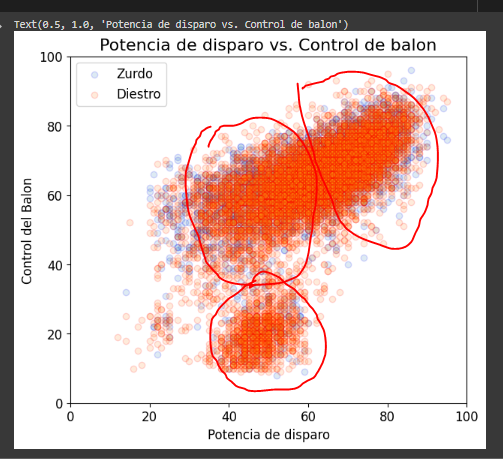

 Implementacion del $k$-means usando `sklearn`

In [ ]:
#Primero debemos crear una nueva Columna para pasar el "Preferred Foot" de STR a INT para que el modelo lo tome

df_modelo = df[["Preferred Foot",  "ShotPower",'BallControl']]
df_modelo['Pie'] = df['Preferred Foot'].map(lambda x: 1 if x == 'Left' else 2)
df_modelo.head(10)

<ipython-input-95-0e0c5fa6816c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Pie'] = df['Preferred Foot'].map(lambda x: 1 if x == 'Left' else 2)


,Preferred Foot,ShotPower,BallControl,Pie
0,Right,89.0,87.0,2
1,Right,85.0,87.0,2
2,Right,89.0,86.0,2
3,Right,91.0,91.0,2
4,Left,82.0,88.0,1
5,Right,78.0,85.0,2
6,Right,83.0,83.0,2
7,Right,78.0,88.0,2
8,Right,85.0,79.0,2
9,Left,82.0,89.0,1


In [ ]:
#Creamos una nueva Variable  df_modelo_ok con todos los datos INT (ahora el Diestro es 2 y el Zurdo es 1)

df_modelo_ok=df_modelo[["Pie", "ShotPower",'BallControl']]
df_modelo_ok.head(10)

,Pie,ShotPower,BallControl
0,2,89.0,87.0
1,2,85.0,87.0
2,2,89.0,86.0
3,2,91.0,91.0
4,1,82.0,88.0
5,2,78.0,85.0
6,2,83.0,83.0
7,2,78.0,88.0
8,2,85.0,79.0
9,1,82.0,89.0


In [ ]:
k = 3 # Definir los grupos 
kmeans = KMeans(n_clusters=k, init='k-means++')
#fit entrena el modelo
kmeans.fit(df_modelo_ok)
#predict asigna los clusters
labels = kmeans.predict(df_modelo_ok)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids

array([[ 1.73804971, 50.06865983, 59.25795237],
       [ 1.74342534, 70.07041947, 70.1324712 ],
       [ 1.86951567, 45.86780627, 22.51509972]])

In [ ]:
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
sum_sq_d = []
K = range(1,14)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_modelo_ok[["ShotPower",'BallControl']])
    sum_sq_d.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

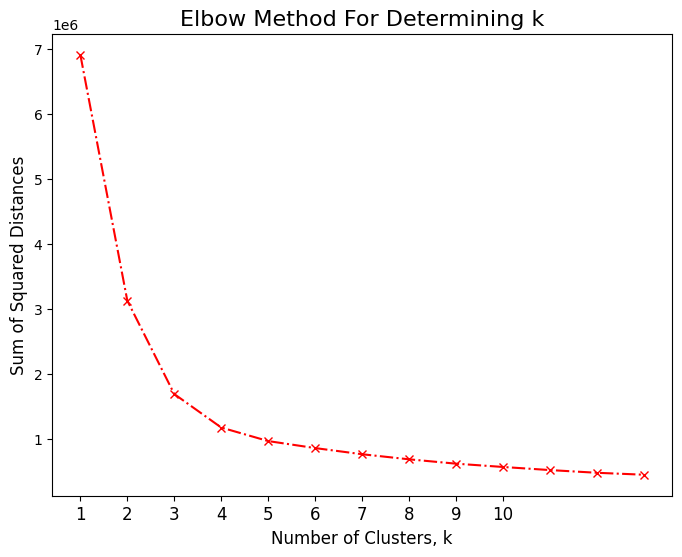

In [ ]:
#Metodo del Codo para verificar el numero de Clusters

plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.show()

Primero se Probo con K=4 se asemeja bastante, luego se prueba con K=3, los datos resultados son bastante cercanos

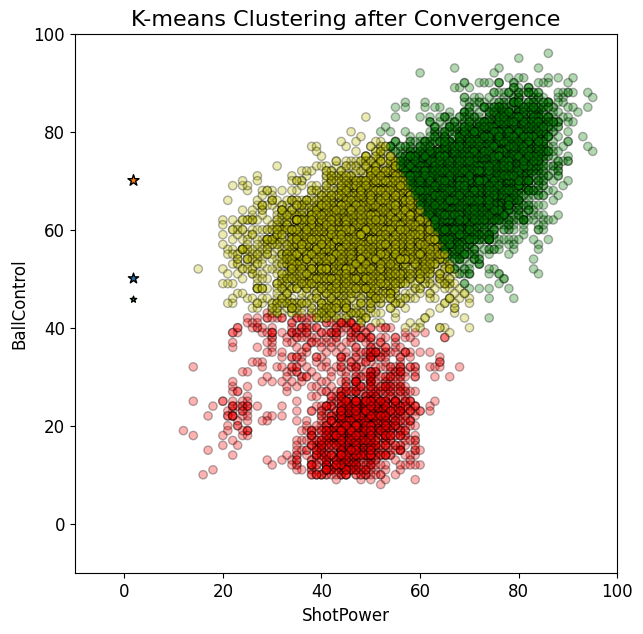

In [ ]:
#Graficamos el modelo

plt.figure(figsize=(7,7))
color_map = {1:'y', 2:'g', 3:'r'}

#colores según el cluster al que pertenezcas
colors = [color_map[x+1] for x in labels]

plt.scatter(df_modelo_ok['ShotPower'], df_modelo_ok['BallControl'], color=colors, alpha=0.3, edgecolor='k')


for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-10,100)
plt.xlabel('ShotPower', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-10,100)
plt.ylabel('BallControl', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()



El modelo se acerca a lo previsto en el Scatter Original, si bien no hay diferencia entre Zurdo y Diestro, si hay 3 zonas de Skills bien marcadas en grupos distintos:

Bajo Control del Balon y potencia de tiro media

Medio Control del balon y potencia de tiro media

Alto control del balon y potencia de tiro Alta

Se podria decir que el modelo se ajusta al DS 

--------------------XXX---------------------------------XXX--------------------------------XXX------------------------XXX-------------------XXX-----------------

**Entregas anteriores (historial)**



-----------------------------------------------------------------------

Entrega 3 DS - Cristina Victor Pablo


**DataSetJuego Futboll Mundial 2026**



Nos llego la solicitud del creador de un Video juegos "SoccerPro NORTH AMERICA 2026" para establacer los niveles de dificultad del mismo.

En la creacion de un video juego de deportes, nos solicitan crear distintos niveles de dificultad para partidos de Futboll contra la maquina, dependiendo de las habilidades y resultados reales de los jugadores inscriptos en la FIFA del ultimo mundial Qatar 2022. El juego debe salir a la venta a principios del 2025, y esta en etapa de desarrollo y evaluacion de mercado, lo que nos esta encargando a nosotros, es etablecer las dificultades del juego dependiendo del equipo de futboll seleccionado por el participante, por un lado, y un nivel de dificultad Fijo, por otro lado, en dos modos diferenste de juego, ellos son:

**Modo de Juego Partida Rapida** - Dificultades Estaticas, sin importar el equipo que selecione el participante.

Modo de dificultad Facil - lo deben poder jugar niños de hasta 10 años.

Nodo de dificultad Media - lo deben poder jugar niños de entre 10 y 16 años

Modo de dificultad Dificil - mas de 16 años

Estos 3 modos de dificultad seran indistintos al potencial del equipo seleccionado por el Player, y son aplicable solo para jugar contra la maquina.

**Modo de Juego Campeonato**

Se debe crear el nivel dificultad para el campeonato de estrellas, el mismo debe estar constituido por los diferentes niveles de dificultas a lo largo del mismo, dependiendo en esta oportunidad, del equipo seleccionado por el Player:

**Grupos** - 3 partidos con niveles de dificultad distintos comparados al equipo que selecciono del jugador:

Primer partido: El equipo seleccionado por la maquina debera tener entre 20% y 25% mayor potencial que el equipo seleccionado por el Player

Segundo partido: El equipo seleccionado por la maquina debera tener entre 30% y 35% mayor potencial que el equipo seleccionado por el Player

Tercer partido: El equipo seleccionado por la maquina debera tener entre 25% y 30% mayor potencial que el equipo seleccionado por el Player

**LLaves Finales**

Octavos de Final - Nivel facil Estrellas - El equipo seleccionado por la maquina debera tener entre 30% y 35% mayor potencial que el equipo seleccionado por el Player

Cuartos de Final - Nivel Medio Estrellas - El equipo seleccionado por la maquina debera tener entre 35% y 40% mayor potencial que el equipo seleccionado por el Player

Semifinal - Nivel Dificil Estrellas - El equipo seleccionado por la maquina debera tener entre 40% y 45% mayor potencial que el equipo seleccionado por el Player

Final - Nivel Final Estrellas -El equipo seleccionado por la maquina debera tener entre 45% y 50% mayor potencial que el equipo seleccionado por el Player

**DATOS**

El Potencial del equipo sera el promedio de las Habilidades que mas resalten de los 11 jugadores que lo componen.

El Modo campeonatos es limitado, por consecuente, el modo partida Rapida debe servir como entrenamiento, para que el Player, pueda armar el equipo que mas le convenga y asi ser competitivo en el Modo Campeonato Estrellas.








Contexto Comercial:

Necesitamos Conocer Cual es el patron que define que haya tanta diferencia de cantidad de jugadores por distintos paices inscriptos in FIFA

**1 er preguta**: Que pais es el que tiene mas jugadores inscriptos en la FIFA (TOP 10)

**2 da pregunta**: Que posisiones de juego son mayoria y que relacion monetaria hay con esos sueldos?





In [ ]:
df.columns
#definimos los datos mas relevantes de cada jugador 

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position', 'Best Overall Rating', 'Release Clause', 'DefensiveAwareness'], dtype='object')

In [ ]:
#Contamos cantidad de jugadores por pais inscriptos en FIFA

#df.groupby('Nationality').size()
#nacion_agrupados = df.groupby('Nationality').size()
#nacion_agrupados = nacion_agrupados.sort_values(ascending=False)
#nacion_agrupados.head(12)

In [ ]:
#plt.pie(nacion_agrupados,autopct='%1.1f%%')#labels=nacion_agrupados)
#plt.title("Porcentaje de jugadores por Pais")
#plt.show()


In [ ]:
#plt.figure(figsize=(14,5))
#plt.subplot()
#nacion_agrupados.plot.bar()

#plt.xlabel("Nacionalidad")
#plt.ylabel("Cantidad de jugadores")
#plt.ylim(0,2000)
#plt.xlim(0,110)

El Pais con mas jugadores inscriptos en FIFA en Inglaterra, No obstante, hay un grupo de 10 paices que se diferencian del resto por gran cantidad de participantes, ese TOP 10 acupan el 50% de la totalidad de Jugadores inscriptos en la FIFA

In [ ]:
# from pickle import NONE
# #Verificamos relacion entre las posiciones de los jugadores y su Valoracion moneratia

# import matplotlib.pyplot as plt
# import seaborn as sns


# f, axs= plt.subplots(2,1,figsize=(20,10))
# #sns.histplot(data=df, y="Nationality", ax=axs[0])
# #sns.scatterplot(data=df, x='Best Position', y="Age", alpha=0.05, ax=axs)
# sns.scatterplot(data=df, x='Wage', y='Best Position', alpha=0.015, ax=axs[0])
# plt.title("Valoracion por posicion de juego")
# plt.xlabel("Sueldo")
# plt.ylabel("posicio de juego")

# sns.countplot(data=df, x="Best Position", ax=axs[1])
# plt.title("Cantidad de jugadores por posicion de juego")



In [ ]:
# Sueldos_jugadores = df.groupby('Wage').size()
# Sueldos_jugadores = Sueldos_jugadores.sort_values(ascending=False)
# Sueldos_jugadores.head(5)

Analizando los dos graficos anteriores, el de Cantidad de jugadores por puesto de juego y el de Sueldos vs posicion de juego , podemos ver algunos insight interesantes:

por un lado, la oferta mayoritaria de posiciones de juego son:

Defensa Central

Medio centro ofensivo

Delantero Central

Esto se debe a que dichas posicione pueden ser tambien ocupadas por jugadores laterales, ahora bien, tambien se observa que hay mas cantidad de Porteros de lo esperado, ya que normalmente por cada equipo hay 2 o 3 porteros, y esa relacion tambien se ve en la distribucion de sueldos.

Tambien se puede observar en el Scatter de distribucion de sueldos, que hay tres escalones marcados, donde practicamente todas las posiciones de juego se posicionan cobrando lo mismo, ellas son:

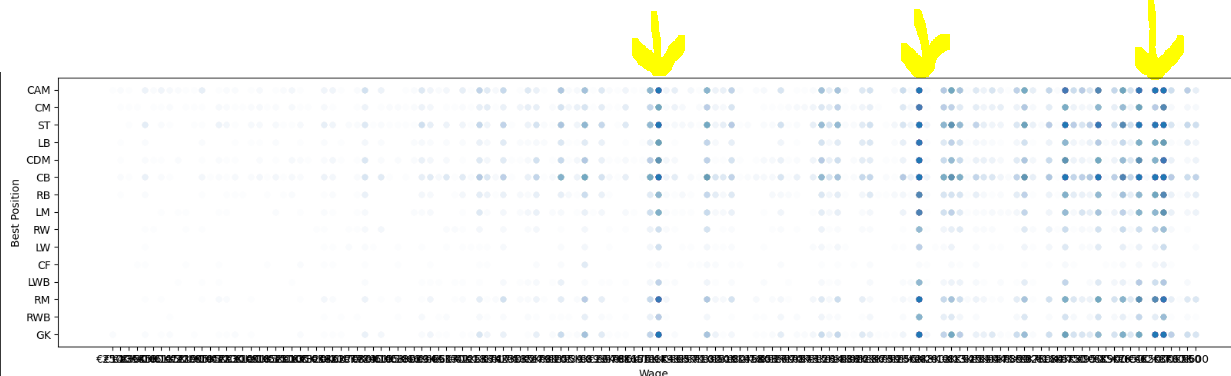


€2K     2316

€3K     1606

€1K     1260
	
	Abreviatura (ING)	Posición
	GK	 Portero
	RWB	Carrilero Derecho
	RB	 Lateral Derecho
	CB 	Defensa Central - 3000 posiciones
	LF 	Lateral Izquierdo
	LWB	Carrilero Izquierdo
	CDM	Medio Centro Defensivo
	RM 	Medio Derecho
	CM 	Medio Centro
	LM 	Medio Izquierdo
	CAM	Medio Centro Ofensivo - 2250 posiciones
	RF 	Segundo Delantero Derecho
	CF 	Media Punta
	LF 	Segundo Delantero Izquierdo
	RW 	Extremo Derecho
	ST 	Delantero Centro - 2500 posiciones
	LW 	Extremo Izquierdo

In [ ]:
#Contamos cantidad de jugadores por equipo de Futboll

# jugadores_agrupados = df.groupby('Club').size()
# jugadores_agrupados = jugadores_agrupados.sort_values(ascending=False)
# jugadores_agrupados.head(20)



In [ ]:
#df.groupby('Club').size()
#df1 = df[['jugadores_agrupados']]
#Nations = df.groupby('Club').size()

#plt.figure(figsize=(10,10))
#plt.subplot()

#jugadores_agrupados.plot.bar()

#plt.xlabel("Club")
#plt.ylabel("Nacionalidad")
#plt.ylim(0,50)
#plt.xlim(0,180)


In [ ]:
#plt.figure(figsize=(10,10))
#plt.subplot(121)

#plt.scatter(df1["Wage"], df1["Nationality"], edgecolor='k', alpha=0.5)

#plt.ylim(100, 200)
#plt.yticks(fontsize=12)
#plt.ylabel('Nationality [$]', fontsize=12)
#plt.xticks(fontsize=12)
#plt.xlim(10, 150)
#plt.xlabel('Wage [$]', fontsize=12)

#plt.title('Nationality vs. Wage', fontsize=16)

--> Segunda Entrega ( 3 graficos matplotlib y 3 graficos seaborn)

In [ ]:
#plt.hist(df['Overall'])
#plt.title("Rendimiento General de los jugadores")
#plt.ylabel("Cantidad de jugadores")
#plt.xlabel("Rendimiento")
#plt.grid(True)

In [ ]:
#plt.boxplot(df['Best Overall Rating', ])
#plt.title("Mejor Calificacion en General")
#plt.xlabel("Jugadores")
#plt.ylabel("Calificacion")
#plt.grid(True)


In [ ]:
#df1 = df[['Overall','Value']]

#plt.figure(figsize=(20,10))
#plt.scatter(df1['Value'],df1['Overall'], alpha=0.15)



#plt.ylim(20, 100)
#plt.yticks(fontsize=5)
#plt.ylabel('Value [$]', fontsize=5)
#plt.xticks(fontsize=5)
#plt.xlim(0, 270)
#plt.xlabel('Overall', fontsize=5)

In [ ]:
#x=df.Age
#y=df.Potential
#plt.scatter(x,y,alpha=0.05,)
#plt.title("Potencial segun la edad")
#plt.xlim(15,45)
#plt.xlabel("Edad de los Jugadores")
#plt.ylim(0,100)
#plt.ylabel("Potencial de los jugadores")

In [ ]:
#sns.displot(data=df, x="Potential", hue="Work Rate", alpha=0.7)


In [ ]:
#df[['ID','Name','Age','Nationality',"Release Clause",'Club','Potential','Skill Moves','Position','Jersey Number','ShortPassing',
#'Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower',
#'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating']]


In [ ]:
#df[['ID','Name','Age','Nationality',"Release Clause",'Club','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys',
#'Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping',
#'Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating']]
#.describe()

In [ ]:
#df[['ID','Name','Age','Nationality',"Release Clause",'Club','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys',
#'Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina',
#'Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating']]
#.median()

In [ ]:
#df[['Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
#'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
#'Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating' ]].quantile([0.05, 0.5, 0.99])
